#### Seattle_travel_recommendation

#### Business Understanding
Seattle is the largest city in the northwestern United States. Seattle has been voted the “most liveable city” in the USA several times and each year the pearl of the Northwest welcomes more than a million tourists into its care. Due to this large number of visitors, there are many different types of accommodation. We would like to give the airbnb users some hints to find the best and cheapest way to stay in Seattle. Therefore we would like to answer the following questions:
1. Which accommodations have the best ratio of rating and price mean_rating/price
2. What are the busiest months of the year to visit Seattle? Is this related to prices?
3. How many accommodations are there for larger groups?
4. Is it always cheapest to look for your actual group size in Seattle? Or should I also look for larger accommodations as the total price could be lower?
5. What is the price for the most expensive night for a person in Seattle?

#### Data Understanding
Access and Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# read calendar.csv
df_cal = pd.read_csv('./calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
# read listing.csv
df_lis = pd.read_csv('./listings.csv')
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# read reviews.csv
df_rev = pd.read_csv('./reviews.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Prepare Data
Wrangle and Clean

In [4]:
#Only use review variables and drop any rows with missing values
num_vars = df_lis[['id', 'listing_url', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]
num_vars.head(30)
print('original dataset size:')
print(num_vars.size)

#Drop the rows with missing reviews
drop_rating_df = num_vars.dropna(subset=['review_scores_rating'], axis=0)
drop_accuracy_df = drop_rating_df.dropna(subset=['review_scores_accuracy'], axis=0)
drop_cleanliness_df = drop_accuracy_df.dropna(subset=['review_scores_cleanliness'], axis=0)
drop_checkin_df = drop_cleanliness_df.dropna(subset=['review_scores_checkin'], axis=0)
drop_communication_df = drop_checkin_df.dropna(subset=['review_scores_communication'], axis=0)
drop_location_df = drop_communication_df.dropna(subset=['review_scores_location'], axis=0)
drop_price_df = drop_location_df.dropna(subset=['price'], axis=0)
drop_value_df = drop_price_df.dropna(subset=['review_scores_value'], axis=0)

print('drop_rating_df size:')
print(drop_rating_df.size)

print('drop_accuracy_df size:')
print(drop_accuracy_df.size)

print('drop_cleanliness_df size:')
print(drop_cleanliness_df.size)

print('drop_checkin_df size:')
print(drop_checkin_df.size)

print('drop_communication_df size:')
print(drop_communication_df.size)

print('drop_location_df size:')
print(drop_location_df.size)

print('drop_price_df size:')
print(drop_price_df.size)

print('drop_value_df size:')
print(drop_value_df.size)

# separate date column into yera, month, day columns for later use
int(df_cal['date'][0].split('-')[0])
df_cal['year'] = df_cal['date'].apply(lambda x : int(x.split('-')[0]))
df_cal['month'] = df_cal['date'].apply(lambda x : int(x.split('-')[1]))
df_cal['day'] = df_cal['date'].apply(lambda x : int(x.split('-')[2]))

original dataset size:
38180
drop_rating_df size:
31710
drop_accuracy_df size:
31600
drop_cleanliness_df size:
31600
drop_checkin_df size:
31590
drop_communication_df size:
31590
drop_location_df size:
31590
drop_price_df size:
31590
drop_value_df size:
31580


#### Question 1
Which accommodations have the best ratio of rating and price mean_rating/price

#### Analyze

In [5]:
# calculate mean of all ratings and create new column for that in drop_value_df dataframe
drop_value_df['mean_rating'] = drop_value_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)

C:\Users\z622912\AppData\Local\Temp\ipykernel_28120\2359710424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['mean_rating'] = drop_value_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)


In [6]:
# transform price from string into float values for later calculation
def price2float(pd_price):
    pd_price = pd_price.apply(lambda x : x[1:] if x.startswith("$") else x)
    pd_price = pd_price.apply(lambda x :  x.replace(",", ""))
    pd_price.astype(float)
    return pd_price

drop_value_df['price'] = price2float(drop_value_df['price'])

C:\Users\z622912\AppData\Local\Temp\ipykernel_28120\627437609.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['price'] = price2float(drop_value_df['price'])


In [7]:
# calculate mean review divided by price
drop_value_df['rev/price']=drop_value_df['mean_rating']/drop_value_df['price'].astype(float)

C:\Users\z622912\AppData\Local\Temp\ipykernel_28120\3182202663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['rev/price']=drop_value_df['mean_rating']/drop_value_df['price'].astype(float)


In [8]:
# show header with new column 'rev/price'
drop_value_df.head(10)
drop_value_df[drop_value_df['id'] ==9727857]

,id,listing_url,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,mean_rating,rev/price
2900,9727857,https://www.airbnb.com/rooms/9727857,100.0,10.0,10.0,10.0,10.0,10.0,10.0,25.00,22.857143,0.914286


#### Visualize

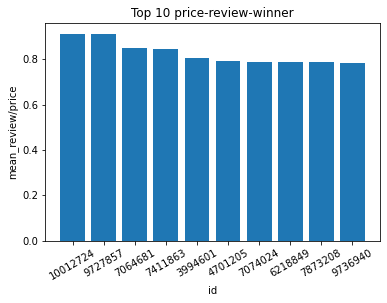

In [9]:
# plot top 10 
best10 = drop_value_df.nlargest(10, 'rev/price')
# Importing the matplotlib library
import matplotlib.pyplot as plt
# Categorical data: Country names
ids = best10['id'].astype(str).tolist()
# Integer value interms of death counts
rev_price = best10['rev/price'].tolist()
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(ids, rev_price)
plt.title('Top 10 price-review-winner')
plt.xlabel('id')
plt.xticks(rotation=30)
plt.ylabel('mean_review/price')
# Displaying the bar plot
plt.show()

#### Explain the visualization

It can be seen that two shelters are at the top. These have a particularly good rating and low price and can be highly recommended. Here are the links to these accommodations:

https://www.airbnb.com/rooms/10012724

https://www.airbnb.com/rooms/9727857

 #### Question 2 
 What are the busiest months of the year to visit Seattle? Is this related to prices?
 
 #### Analyze

In [10]:
# use only year 2016, because there are the most data and I want to prevent to overlap different years
df_cal_2016 = df_cal.loc[df_cal['year'] == 2016]
# check how many different years are in the dataset
df_cal['year'].value_counts()

df_temp = df_cal_2016.loc[df_cal['month'] == 1]
df_temp['available'].value_counts()['t']

59239

In [11]:
avail=[]
month=[]
for jj in range(1,13):
    df_temp = df_cal_2016.loc[df_cal['month'] == jj]
    avail.append(df_temp['available'].value_counts()['t']/len(df_temp['available'])*100)
    month.append(jj)
    
print(month)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [12]:
# drop nans
df_cal_2016_nan = df_cal_2016.dropna(subset=['price'], axis=0)
# convert price to only numbers (preprocessing for later float conversion)
df_cal_2016_nan['price'] = price2float(df_cal_2016_nan['price'])

C:\Users\z622912\AppData\Local\Temp\ipykernel_28120\3886080996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_2016_nan['price'] = price2float(df_cal_2016_nan['price'])


In [13]:
# calculate mean price for different months
price = []
for jj in range(1,13):
    df_temp = df_cal_2016_nan.loc[df_cal_2016_nan['month'] == jj]
    price.append(df_temp['price'].astype(float).mean())

#### Visualize

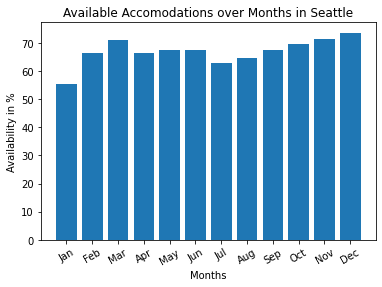

In [14]:
# plot Available Accomodations over Months in Seattle
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, avail)
plt.title('Available Accomodations over Months in Seattle')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Availability in %')
# Displaying the bar plot
plt.show()

#### Explain the visualisation

January are the busiest month in the year, In March and December are a lot of accomodations available. It looks like that in summer are a little bit more visitors in Seattle than in winter.

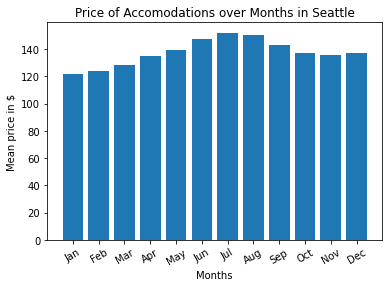

In [15]:
# plot Price of Accomodations over Months in Seattle
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, price)
plt.title('Price of Accomodations over Months in Seattle')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Mean price in $')
# Displaying the bar plot
plt.show()

In [16]:
avail_np = np.array(avail)
price_np = np.array(price)

np.corrcoef(avail_np, price_np)[0,1]

0.1260832494969748

#### Explain the visualisation

figure above:
The prices are getting higher during summer than in winter. The maximum is reached in july and the minimum in december.

correslation factor above
There is only a very small positive corellation between the price and the availability per months. In summer is the a lower availability an therefore the prices are higher than in winter.

#### Question 3
How many accommodations are there for larger groups?

#### Analyze

In [17]:
# available accomodations for different group sizes
people_size = []
nr_acc = []
uniq_val = df_lis['guests_included'].unique()
for idx in uniq_val:
    nr_acc.append(df_lis['guests_included'].value_counts()[idx])
    people_size.append(idx)
#df_lis['guests_included'].value_counts()#.to_list()
print(df_lis['guests_included'].value_counts())

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
10       2
9        2
11       1
15       1
13       1
12       1
Name: guests_included, dtype: int64


#### Visualize

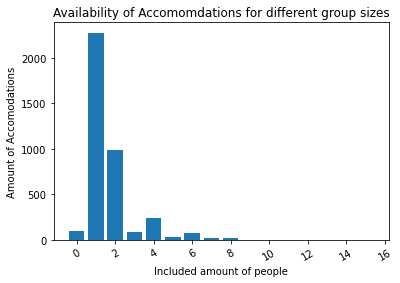

In [18]:
# plot Availability of Accomomdations for different group sizes
plt.bar(people_size, nr_acc)
plt.title('Availability of Accomomdations for different group sizes')
plt.xlabel('Included amount of people')
plt.xticks(rotation=30)
plt.ylabel('Amount of Accomodations')
# Displaying the bar plot
plt.show()

#### Explain the visualization
It is easy to see, that there are a lot of accommodations for 1 and 2 persons and a few for 3-8 persons. For this study we neglet the possibility to add extra persons in a room. We only focus on the already included amount of people. To have a dataset with at least 10 different accomodations, we use for the next analysis only the accomodations where 1-8 persons are already included.

#### Question 4 and 5
- Is it always cheapest to look for your actual group size in Seattle? Or should I also look for larger accommodations as the total price could be lower?
- What is the price for the most expensive night for a person in Seattle?

#### Analyze

In [19]:
# cheapest prices and most expensive prices for different group sizes
df_lis['price'] = price2float(df_lis['price'])

In [20]:
# calculate max, min and average prices for different group sizes
max_price = []
min_price = []
group_size = []
avg_price=[]
for i in range(1,9):
    max_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).max())
    min_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).min())
    avg_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).mean())
    group_size.append(i)

#### Visualize

Text(0.5, 1.0, 'total prices over group size')

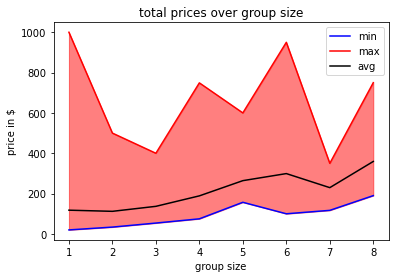

In [21]:
#plot
plt.plot(group_size, min_price,color='blue')
plt.plot(group_size, max_price, color='red')
plt.plot(group_size, avg_price, color='black')
plt.fill_between(group_size, min_price, max_price, color='red', alpha=0.5)
plt.xlabel('group size')
plt.ylabel('price in $')
plt.legend(['min', 'max', 'avg'])
plt.title('total prices over group size')


#### Explain the visualization
The min price is roughly increasing with the amount of gropu size. That means it make sense to only search for the group size which you really need, if you want to spend the night very cheap. But there is an exception at 5 persons. So if you are only 5 Persons it could make sense to search also for accomodations for 6 oder 7 persons, because they could be cheaper. The same effect can be seen in the average price. If you are actually 6 Persons you should also search for 7 Persons, because this accomodations are in average cheaper than the 6 Persons accomodations. In total it can be seen that there are only a few very expensive accomodations, because the average cuve is very close to the min curve and far away from the max curve. Interessting fun fact: it is possible to spend a night for a single person for 1000$ in Seattle.